In [13]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 45.8 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 63.7 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 103.1/103.1 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

In [3]:

pip install patchify

  Using cached patchify-0.2.3-py3-none-any.whl (6.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [2]:
mxscaler = MinMaxScaler()

In [3]:
dataset_name= "satellite"

In [4]:
for path, subdirs, files in os.walk(dataset_name):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

satellite\Tile 1\masks
satellite\Tile 2\masks
satellite\Tile 3\masks
satellite\Tile 4\masks
satellite\Tile 5\masks
satellite\Tile 6\masks
satellite\Tile 7\masks
satellite\Tile 8\masks


In [5]:
image_patch_size =256

In [6]:
image = cv2.imread(f'{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [7]:
image_patches= patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [8]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [9]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = mxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [10]:
image_y[0].shape

(256, 256, 3)

In [11]:
print(type(image))

<class 'numpy.ndarray'>


In [12]:
type(Image.fromarray(image))

PIL.Image.Image

In [13]:
image.shape

(544, 509, 3)

In [14]:
(image.shape[1]//image_patch_size)*image_patch_size

256

In [112]:
image_dataset =[]
mask_dataset = [] 

for image_type in ['images' , 'masks']:
    if image_type == 'images':
        image_extension = 'jpg' 
    elif image_type == 'masks':
        image_extension = 'png'
    
    for tile_id in range(1,8):
        for image_id in range(1,20):
            image = cv2.imread(f'{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
            if image is not None:
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
               #print(image.shape)
                size_x = (image.shape[1]//image_patch_size)*image_patch_size
                size_y = (image.shape[0]//image_patch_size)*image_patch_size
                #print("{} --- {} - {} ".format(image.shape, size_x, size_y))
                image = Image.fromarray(image)
                image = image.crop((0,0, size_x, size_y))     
                #print("{} --- {} ".format(image.size[0], image.size[1]))
                image= np.array(image)
                patched_images= patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
                #print(len(patched_images))
                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):  
                        if image_type == 'images': 
                            ind_img = patched_images[i,j,:,:]
                            #print(ind_img.shape)
                            ind_img = mxscaler.fit_transform(ind_img.reshape(-1, ind_img.shape[-1])).reshape(ind_img.shape)
                            ind_img = ind_img[0]
                            #print(ind_img.shape)
                            image_dataset.append(ind_img)                        
                        elif image_type == 'masks':
                            ind_msk = patched_images[i,j,:,:]
                            ind_msk = ind_msk[0]
                            mask_dataset.append(ind_msk)

In [16]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [17]:
mask_dataset[44]

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [226, 169,  41],
        [226, 169,  41],
        [226, 169,  41]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [226, 169,  41],
        [226, 169,  41],
        [226, 169,  41]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [226, 169,  41],
        [226, 169,  41],
        [226, 169,  41]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [110, 193, 228],
        [110, 193, 228]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [110, 193, 228],
        [110, 193, 228],
        [110, 193, 228]]

In [18]:
image_dataset[0]

array([[[0.78823529, 0.76470588, 0.74509804],
        [0.88235294, 0.85882353, 0.83921569],
        [0.94509804, 0.90980392, 0.89411765],
        ...,
        [0.89411765, 0.85882353, 0.82352941],
        [0.85882353, 0.83137255, 0.79607843],
        [0.87843137, 0.85098039, 0.81568627]],

       [[0.88627451, 0.8627451 , 0.84313725],
        [0.99607843, 0.97254902, 0.95294118],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89803922, 0.8627451 ],
        [0.92941176, 0.90196078, 0.86666667],
        [0.95294118, 0.91764706, 0.88235294]],

       [[0.97254902, 0.94509804, 0.93333333],
        [1.        , 0.98823529, 0.97647059],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89411765, 0.86666667],
        [0.92156863, 0.89411765, 0.85882353],
        [0.90196078, 0.86666667, 0.83137255]],

       ...,

       [[0.88235294, 0.8627451 , 0.86666667],
        [0.81960784, 0.80392157, 0.8       ],
        [0.7372549 , 0

In [19]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [20]:
mask_dataset.shape

(945, 256, 256, 3)

In [21]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

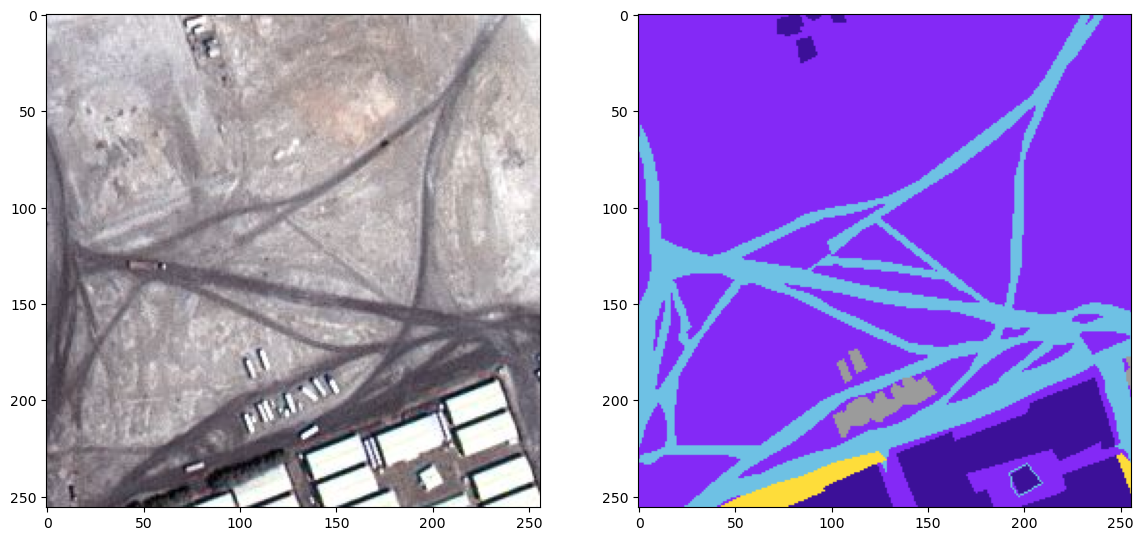

In [24]:
rand_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[rand_id])
plt.subplot(122)
plt.imshow(mask_dataset[rand_id])

In [25]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [26]:
label = ind_msk 

In [27]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape, dtype=np.uint8)
    label_segment[np.all(label == class_water, axis=-1)] = 0
    label_segment[np.all(label == class_land, axis=-1)] = 1
    label_segment[np.all(label == class_road, axis=-1)] = 2
    label_segment[np.all(label == class_building, axis=-1)] = 3
    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    #print(label_segment)
    label_segment = label_segment[:,:,0]
    #print(label_segment)
    return label_segment

In [28]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)

In [29]:
labels = np.array(labels)

In [30]:
labels[44]

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]], dtype=uint8)

In [31]:
labels = np.expand_dims(labels, axis=3)

In [32]:
labels[44]

array([[[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [2],
        [2]],

       [[1],
        [1],
        [1],
        ...,
        [2],
        [2],
        [2]]], dtype=uint8)

In [33]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [34]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


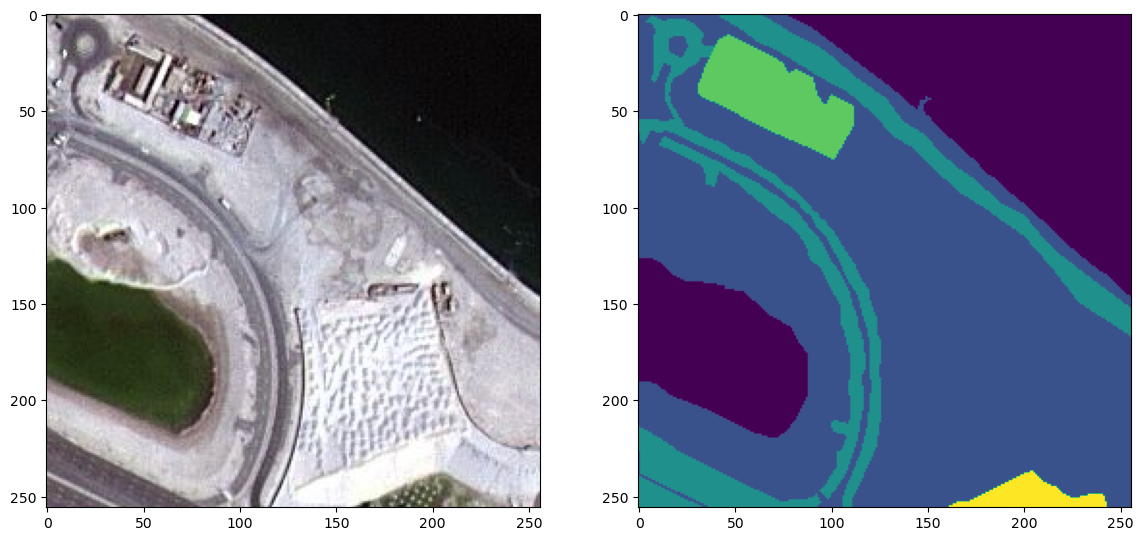

In [40]:
rand_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[rand_id])
plt.subplot(122)
#plt.imshow(mask_dataset[rand_id])
plt.imshow(labels[rand_id][:,:,0])

In [41]:
total_classes = len(np.unique(labels))


In [42]:
total_classes

6

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
label_cat_dataset = to_categorical(labels, num_classes=total_classes)

In [45]:
label_cat_dataset.shape

(945, 256, 256, 6)

In [47]:
master_train_dataset.shape

(945, 256, 256, 3)

In [46]:
master_train_dataset = image_dataset

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(master_train_dataset, label_cat_dataset, test_size=0.15, random_state=100)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [52]:
img_height = X_train.shape[1]
img_width = X_train.shape[2]
img_channels = X_train.shape[3]
total_classes = Y_train.shape[3]

In [53]:
print(img_height)
print(img_width)
print(img_channels)
print(total_classes)

256
256
3
6


In [50]:
!pip install -U segmentation-models

  Using cached segmentation_models-1.0.1-py3-none-any.whl (33 kB)
  Using cached efficientnet-1.0.0-py3-none-any.whl (17 kB)
  Using cached image_classifiers-1.0.0-py3-none-any.whl (19 kB)
     --------------------------------------- 12.1/12.1 MB 40.9 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 30.9 MB/s eta 0:00:00
     ---------------------------------------- 178.9/178.9 kB ? eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 53.1 MB/s eta 0:00:00
     ---------------------------------------- 313.2/313.2 kB ? eta 0:00:00


In [54]:
from keras.models import Model
from keras.layers import Input,Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [55]:
from keras import backend as K

In [56]:
%env SM_FRAMEWORK = tf.keras

env: SM_FRAMEWORK=tf.keras


In [57]:
def jaccard_coef(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    intrsn = K.sum(y_true_flatten * y_pred_flatten)
    coef = (intrsn + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) + K.sum(y_pred_flatten) - intrsn + 1.0)
    return coef

In [58]:
def unet_model(n_classes=5, img_height=256, img_width=256, img_channels=1):

    inputs = Input((img_height, img_width, img_channels))  

    src_input = inputs

    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(src_input)
    c1 = Dropout(0.2)(c1)
    cl = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(c5)

    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32 , (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16 , (3,3), activation="relu", kernel_initializer="he_normal", padding="same" )(c9)

    outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [59]:
metrics = ["accuracy", jaccard_coef]

In [60]:
print(img_height)
print(img_width)
print(img_channels)
print(total_classes)

256
256
3
6


In [61]:
def get_dl_model():
    return unet_model(n_classes = total_classes,
                     img_height = img_height,
                     img_width = img_width,
                     img_channels = img_channels)

In [62]:
model = get_dl_model()

In [207]:
#model.get_config()

{'name': 'model_1',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_6'},
   'registered_name': None,
   'name': 'input_6',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d_7',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer

# Generating Loss Function

In [63]:
weights = [0.166,0.166,0.166,0.166,0.166,0.166]

In [64]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [65]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [66]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [67]:
total_loss = dice_loss + (1 * focal_loss)

# Model compilation

In [68]:
import tensorflow as tf

In [69]:
tf.keras.backend.clear_session()

In [70]:
model.compile(optimizer="Adam", loss=total_loss, metrics=metrics)

In [71]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)         0         ['dropout[0][0]']             
 D)                                                                                           

                                                                                                  
 concatenate_3 (Concatenate  (None, 256, 256, 32)         0         ['conv2d_transpose_3[0][0]',  
 )                                                                   'dropout[0][0]']             
                                                                                                  
 conv2d_16 (Conv2D)          (None, 256, 256, 16)         4624      ['concatenate_3[0][0]']       
                                                                                                  
 dropout_8 (Dropout)         (None, 256, 256, 16)         0         ['conv2d_16[0][0]']           
                                                                                                  
 conv2d_17 (Conv2D)          (None, 256, 256, 16)         2320      ['dropout_8[0][0]']           
                                                                                                  
 conv2d_18

In [72]:
model_history = model.fit(X_train,Y_train,
                           batch_size=16,
                           verbose=1,
                           epochs=100,
                           validation_data=(X_test,Y_test),
                           shuffle=False)


Epoch 1/100
51/51 [==============================] - 196s 4s/step - loss: 1.0013 - accuracy: 0.5395 - jaccard_coef: 0.1611 - val_loss: 0.9938 - val_accuracy: 0.5856 - val_jaccard_coef: 0.1825
Epoch 2/100
51/51 [==============================] - 189s 4s/step - loss: 0.9871 - accuracy: 0.6335 - jaccard_coef: 0.2080 - val_loss: 0.9731 - val_accuracy: 0.6998 - val_jaccard_coef: 0.2208
Epoch 3/100
51/51 [==============================] - 175s 3s/step - loss: 0.9686 - accuracy: 0.6968 - jaccard_coef: 0.2491 - val_loss: 0.9583 - val_accuracy: 0.7349 - val_jaccard_coef: 0.2595
Epoch 4/100
51/51 [==============================] - 173s 3s/step - loss: 0.9562 - accuracy: 0.7392 - jaccard_coef: 0.2802 - val_loss: 0.9509 - val_accuracy: 0.7437 - val_jaccard_coef: 0.2760
Epoch 5/100
51/51 [==============================] - 173s 3s/step - loss: 0.9485 - accuracy: 0.7600 - jaccard_coef: 0.2969 - val_loss: 0.9545 - val_accuracy: 0.7204 - val_jaccard_coef: 0.2758
Epoch 6/100
51/51 [=====================

51/51 [==============================] - 172s 3s/step - loss: 0.8913 - accuracy: 0.8860 - jaccard_coef: 0.4041 - val_loss: 0.9134 - val_accuracy: 0.8554 - val_jaccard_coef: 0.3885
Epoch 86/100
51/51 [==============================] - 171s 3s/step - loss: 0.8939 - accuracy: 0.8829 - jaccard_coef: 0.4022 - val_loss: 0.9118 - val_accuracy: 0.8594 - val_jaccard_coef: 0.3916
Epoch 87/100
51/51 [==============================] - 171s 3s/step - loss: 0.8913 - accuracy: 0.8865 - jaccard_coef: 0.4048 - val_loss: 0.9097 - val_accuracy: 0.8643 - val_jaccard_coef: 0.3942
Epoch 88/100
51/51 [==============================] - 171s 3s/step - loss: 0.8926 - accuracy: 0.8847 - jaccard_coef: 0.4036 - val_loss: 0.9107 - val_accuracy: 0.8633 - val_jaccard_coef: 0.3945
Epoch 89/100
51/51 [==============================] - 171s 3s/step - loss: 0.8911 - accuracy: 0.8875 - jaccard_coef: 0.4060 - val_loss: 0.9098 - val_accuracy: 0.8647 - val_jaccard_coef: 0.3941
Epoch 90/100
51/51 [============================

In [74]:
info = model_history

In [75]:
info.history

{'loss': [1.001326560974121,
  0.9871223568916321,
  0.9685513973236084,
  0.9562477469444275,
  0.9485383033752441,
  0.9443483948707581,
  0.9396238327026367,
  0.9355888962745667,
  0.9318667650222778,
  0.9277089238166809,
  0.9253695607185364,
  0.9238178133964539,
  0.9255512952804565,
  0.921897292137146,
  0.9201668500900269,
  0.9191486239433289,
  0.9182758331298828,
  0.9174877405166626,
  0.9169006943702698,
  0.91635662317276,
  0.9157951474189758,
  0.9156020879745483,
  0.91474848985672,
  0.9140489101409912,
  0.9133372902870178,
  0.9127354621887207,
  0.9119351506233215,
  0.9112556576728821,
  0.9111868739128113,
  0.9112935662269592,
  0.9110991358757019,
  0.9101864099502563,
  0.9096187353134155,
  0.9094600081443787,
  0.9089610576629639,
  0.9076040983200073,
  0.9069970846176147,
  0.9070752859115601,
  0.9069246053695679,
  0.9060326814651489,
  0.9066435098648071,
  0.9062584638595581,
  0.9058932065963745,
  0.9058136343955994,
  0.9055145382881165,
  0.9052

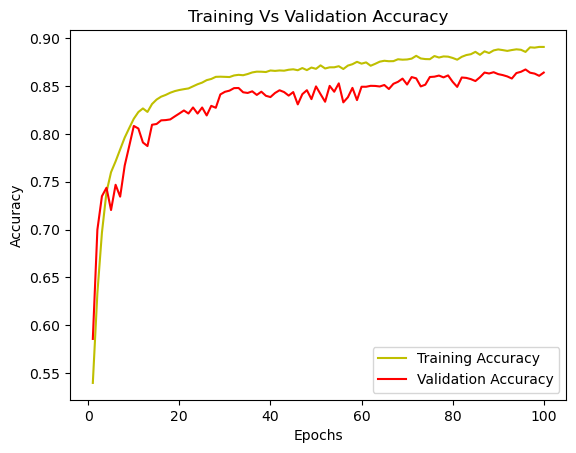

In [116]:
accuracy = info.history['accuracy']
val_accuracy = info.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'y', label= "Training Accuracy")
plt.plot(epochs, val_accuracy, 'r', label="Validation Accuracy")
plt.title("Training Vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1]:
loss = info.history['loss']
val_loss = info.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label= "Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


NameError: name 'info' is not defined

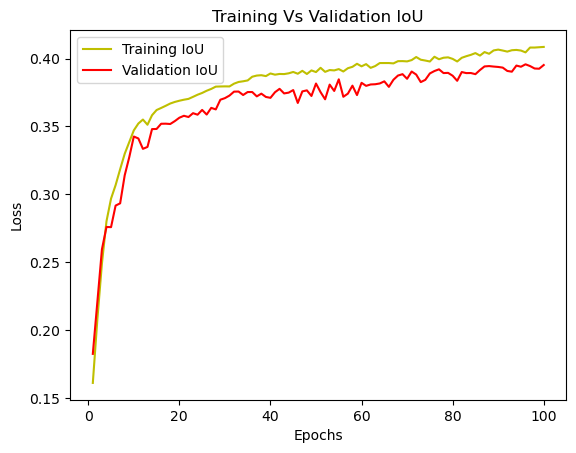

In [114]:
jaccard_coef = info.history['jaccard_coef']
val_jaccard_coef = info.history['val_jaccard_coef']
epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label= "Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [79]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

In [80]:
y_pred = model.predict(X_test)

5/5 [==============================] - 5s 970ms/step


In [81]:
len(y_pred)

142

In [83]:
y_pred_arg = np.argmax(y_pred, axis=3)

In [84]:
len(y_pred_arg)

142

In [85]:
y_pred_arg

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 4, 4, 4],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 4, 4, 1],
        [0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 3, 1, 1],
        [2, 2, 2, ..., 3, 1, 1],
        [2, 2, 2, ..., 3, 3, 3],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [1, 1, 2, ..., 2, 2, 2],
        [1, 2, 2, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [86]:
y_test_arg = np.argmax(Y_test, axis=3)

In [87]:
len(y_test_arg)

142

In [88]:
y_test_arg

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# Comparing prediction results 

In [119]:

test_image_no = 10
test_image = X_test[test_image_no]
ground_truth_image = y_test_arg[test_image_no]

test_image_input = np.expand_dims(test_image, 0)

pred = model.predict(test_image_input)
pred_img = np.argmax(pred, axis=3)
pred_img = pred_img[0,:,:]

1/1 [==============================] - 0s 66ms/step


In [108]:
pred_img

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

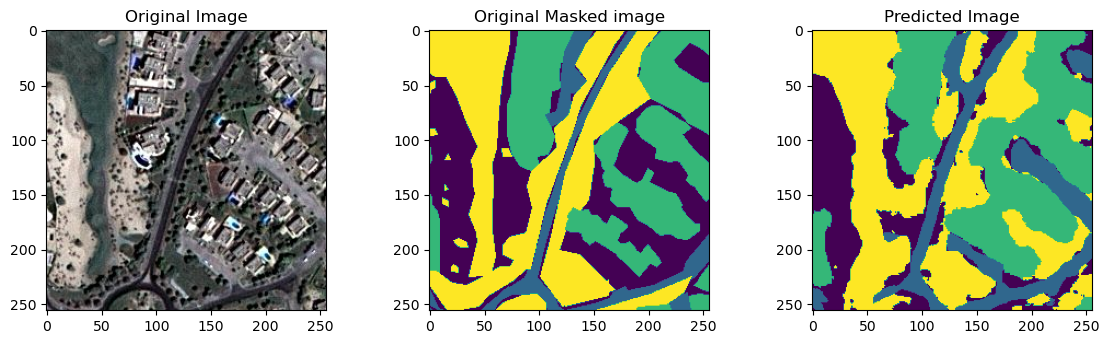

In [120]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(pred_img)